In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Import the dataframe

df = pd.read_csv("clean_data.csv", index_col=0)
df

,invoice_id,branch,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total,date,time,payment,cogs,gross_margin_percentage,gross_income,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1


In [34]:
# Total sales by branch and customer_type

sales_by_branch_customer_type = df.groupby(["branch", "customer_type"])["total"].sum().reset_index()
sales_by_branch_customer_type["total"] = sales_by_branch_customer_type["total"].round(2)
sales_by_branch_customer_type


,branch,customer_type,total
0,A,Member,53637.48
1,A,Normal,52562.90
2,B,Member,53704.69
3,B,Normal,52492.99
4,C,Member,56881.28
5,C,Normal,53687.42


In [35]:
# Identify the days with the highest income.

income_by_day = df.groupby(["date"])["total"].sum().reset_index()

# highest_income_days = income_by_day.sort_values(by="total", ascending=False).reset_index(drop=True)
highest_income_days = income_by_day.sort_values(by="total", ascending=False).round(2).reset_index(drop=True) 

highest_income_days

,date,total
0,2019-03-09,7474.05
1,2019-02-07,7228.21
2,2019-03-14,7214.63
3,2019-02-15,6830.79
4,2019-03-02,6560.31
...,...,...
84,2019-02-18,1496.03
85,2019-03-07,1438.26
86,2019-02-21,1393.74
87,2019-03-18,1292.83


In [36]:
# Calculates average ticket by client

average_ticket = df['total'].mean()
print(f"El ticket promedio por cliente es: ${average_ticket:.2f}")

El ticket promedio por cliente es: $322.97


In [45]:
# Analysis payment methods distribution

payment_method_distribution = df['payment'].value_counts().reset_index()
payment_method_distribution.columns = ["payment_method", "quantity"]
# payment_method_distribution['percentage'] = (payment_method_distribution['quantity'] / payment_method_distribution['quantity'].sum()) * 100
payment_method_distribution['percentage'] = (payment_method_distribution['quantity'] / df.shape[0]) * 100 #Dataframe's rows df.shape[0]
payment_method_distribution

,payment_method,quantity,percentage
0,Ewallet,345,34.5
1,Cash,344,34.4
2,Credit card,311,31.1


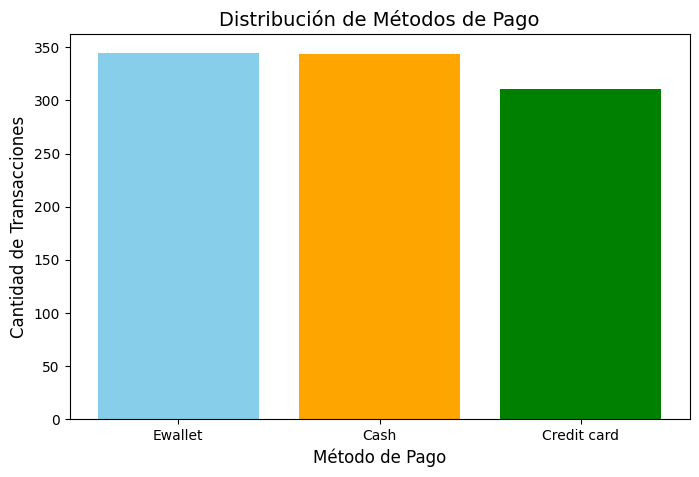

In [44]:
plt.figure(figsize=(8, 5))
plt.bar(payment_method_distribution["payment_method"], payment_method_distribution["quantity"], color=['skyblue', 'orange', 'green'])
plt.title("Distribución de Métodos de Pago", fontsize=14)
plt.xlabel("Método de Pago", fontsize=12)
plt.ylabel("Cantidad de Transacciones", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()